# WeatherPy
----

### Summary
* Using __citipy__ a list of 625 cities was randomly generated.

* After the request to __OpenWeatherMap API__ a list of __561__ dictionaries was generated. The data obtained for each city was: City name,	Cloudiness (%),	Country	code, Date,	Humidity (%), Latitude, Longitude, Maximum temperature (°C) and	Wind Speed (meter/sec).

* The __50%__ of the 561 cities were concentrated in the following __eleven countries__: Russian Federation (13%), United States of America (9%), Brazil (6%), Canada (5%), China (3%), Australia (3%), Indonesia (3%), India (2%), Argentina (2%), Philippines (2%), and Mexico (2%).

* There were __ten__ countries in the sample where the Equator at 0° latitude crosses through, corresponding to 68 cities of the 561 (12%).
---
### Analysis
In the dates of the requests (03/26/2019 - 03/27/2019):

* The maximum temperatures were __lower than 10°C__ where the __latitudes were higher than 20°__ (toward the North Hemisphere). The 57% of the cities between -40° and 40° latitudes had temperatures higher than 10°C, showing that __the weather becomes warmer as one approaches the Equator__ (0° latitude). This time of year, the southern hemisphere tends to be warmer than the northern hemisphere. 

* There is no clear relationship between __latitude and cloudiness__. However, a strong band of cities sits at 0 (30%), 20 (7%), 40 (6%), and 75 (9%) percent of cloudiness.

* There is no clear relationship between __latitude and humidity__, but it is a set of cities at 100% of humidity (50 cities, less than 10% of the sample).

* There is no clear relationship between __latitude and wind speed__. The 38% of the cities in the sample had a range between 1 and 5 mph. Only 12 cities had a wind speed greater than 10 mph, corrresponding to countries such as Bermuda, Costa Rica, Greenland, New Zealand, Russian Federation, United States of America, and Venezuela (Bolivarian Republic of).
---

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
#Show the content of the list
cities

['minot',
 'arraial do cabo',
 'mahebourg',
 'asau',
 'kyra',
 'taolanaro',
 'tura',
 'cockburn town',
 'mar del plata',
 'vaini',
 'rikitea',
 'isagarh',
 'busselton',
 'umm kaddadah',
 'cidreira',
 'zhuanghe',
 'mataura',
 'tabuk',
 'cabo san lucas',
 'georgetown',
 'severo-kurilsk',
 'koumac',
 'padang',
 'lorengau',
 'andenes',
 'port alfred',
 'caravelas',
 'batemans bay',
 'tiznit',
 'hambantota',
 'dzhusaly',
 'ushuaia',
 'lagoa',
 'yulara',
 'hilo',
 'vershino-darasunskiy',
 'maningrida',
 'torbay',
 'saldanha',
 'sabha',
 'morales',
 'te anau',
 'hermanus',
 'punta arenas',
 'khatanga',
 'kaitangata',
 'katsuura',
 'petropavlovsk-kamchatskiy',
 'hasaki',
 'dingle',
 'dikson',
 'tecoanapa',
 'qaanaaq',
 'havre-saint-pierre',
 'albany',
 'puerto ayora',
 'nizhneyansk',
 'barranca de upia',
 'yenagoa',
 'sao joao da barra',
 'barrow',
 'astaneh-ye ashrafiyeh',
 'hithadhoo',
 'bethel',
 'saint george',
 'norman wells',
 'prince rupert',
 'ishigaki',
 'avarua',
 'launceston',
 'izb

In [41]:
# Define base query URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Request the results in Celsius
units = "metric"

# Dictionary and list to store the information from the responses
temperatures = {}
temp_list = []

# Counters for the records and the sets 
record = 1
set = 1

In [42]:
# Beginning log
print(f"Beginning Data Retrieval\n-----------------------------")

for city in cities:
    # Build query URL and request in Celsius
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    
    # Get weather data
    weather_response = requests.get(query_url)
    
    # Evaluate if the response was successful
    if (weather_response.status_code == 200):
        # Get JSON from the response
        weather_json = weather_response.json()
        
        # Get temperature from JSON response and store them in the dictionary
        temperatures = {
            "city" : weather_json["name"],
            "cloudiness" : weather_json["clouds"]["all"],
            "country" : weather_json["sys"]["country"],
            "date" : weather_json["dt"],
            "humidity" : weather_json["main"]["humidity"],
            "lat" : weather_json["coord"]["lat"],
            "lng" : weather_json["coord"]["lon"],
            "max temp" : weather_json["main"]["temp_max"],
            "wind speed" : weather_json["wind"]["speed"]
        }

        # Add the values to the list
        temp_list.append(temperatures)
        
        # Report temperature to the log
        print(f"Processing Record {record} of Set {set} | {city}")

        # Increment the count of records for the log
        record = record + 1
        
    else:
        # Report city not found in the API for the log
        print(f"City not found. Skipping... | {city}")
        
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    if record > 50:
        set = set + 1
        record = 1

# Ending log
print(f"-----------------------------\nData Retrieval Complete\n-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | minot
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | mahebourg
City not found. Skipping... | asau
City not found. Skipping... | kyra
City not found. Skipping... | taolanaro
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | cockburn town
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | isagarh
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | umm kaddadah
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | zhuanghe
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | tabuk
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | koumac
Processing Record 20 of Set 1 | padang
Process

Processing Record 29 of Set 4 | nanortalik
Processing Record 30 of Set 4 | rudnyy
Processing Record 31 of Set 4 | nantucket
Processing Record 32 of Set 4 | jamestown
Processing Record 33 of Set 4 | vardo
City not found. Skipping... | vaitupu
Processing Record 34 of Set 4 | hobart
City not found. Skipping... | barentsburg
Processing Record 35 of Set 4 | aktau
Processing Record 36 of Set 4 | kruisfontein
Processing Record 37 of Set 4 | bagan
Processing Record 38 of Set 4 | fortuna
Processing Record 39 of Set 4 | kovdor
Processing Record 40 of Set 4 | ulaangom
Processing Record 41 of Set 4 | price
Processing Record 42 of Set 4 | sampit
City not found. Skipping... | attawapiskat
Processing Record 43 of Set 4 | zadar
Processing Record 44 of Set 4 | rawson
City not found. Skipping... | toliary
Processing Record 45 of Set 4 | muravlenko
Processing Record 46 of Set 4 | diamantino
Processing Record 47 of Set 4 | bereda
City not found. Skipping... | bengkulu
Processing Record 48 of Set 4 | amapa

Processing Record 5 of Set 8 | rovaniemi
Processing Record 6 of Set 8 | george
Processing Record 7 of Set 8 | storforshei
Processing Record 8 of Set 8 | meadow lake
Processing Record 9 of Set 8 | benidorm
Processing Record 10 of Set 8 | bradford
Processing Record 11 of Set 8 | lagos
Processing Record 12 of Set 8 | dali
Processing Record 13 of Set 8 | bathsheba
Processing Record 14 of Set 8 | dafeng
City not found. Skipping... | tahta
Processing Record 15 of Set 8 | atherton
Processing Record 16 of Set 8 | nuuk
Processing Record 17 of Set 8 | aklavik
Processing Record 18 of Set 8 | tuatapere
Processing Record 19 of Set 8 | sobolevo
Processing Record 20 of Set 8 | ulcinj
Processing Record 21 of Set 8 | ust-kan
Processing Record 22 of Set 8 | antofagasta
Processing Record 23 of Set 8 | sargatskoye
Processing Record 24 of Set 8 | jumla
Processing Record 25 of Set 8 | nizhniy kuranakh
Processing Record 26 of Set 8 | yamethin
Processing Record 27 of Set 8 | shingu
Processing Record 28 of Set

Processing Record 34 of Set 11 | santana do ipanema
Processing Record 35 of Set 11 | port lincoln
Processing Record 36 of Set 11 | logan lake
Processing Record 37 of Set 11 | touros
Processing Record 38 of Set 11 | kalmunai
Processing Record 39 of Set 11 | san quintin
City not found. Skipping... | tumannyy
Processing Record 40 of Set 11 | vanavara
City not found. Skipping... | ngama
Processing Record 41 of Set 11 | lata
Processing Record 42 of Set 11 | byron bay
Processing Record 43 of Set 11 | kendari
Processing Record 44 of Set 11 | bhilwara
Processing Record 45 of Set 11 | lander
Processing Record 46 of Set 11 | acajutla
Processing Record 47 of Set 11 | ilinskiy
Processing Record 48 of Set 11 | wiang sa
Processing Record 49 of Set 11 | amarante do maranhao
Processing Record 50 of Set 11 | safranbolu
Processing Record 1 of Set 12 | krasnokholmskiy
Processing Record 2 of Set 12 | hammerfest
Processing Record 3 of Set 12 | marabba
Processing Record 4 of Set 12 | port pirie
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
# Show the number on cities with weather data
len(temp_list)

561

In [45]:
# Convert the dictionary into a dataframe
city_data_pd = pd.DataFrame(temp_list)

# Export the city data into a .csv.
city_data_pd.to_csv(output_data_file, index=False, header=True)

# Display the City Data Frame
city_data_pd.head()

,city,cloudiness,country,date,humidity,lat,lng,max temp,wind speed
0,Minot,1,US,1553647251,70,48.23,-101.30,9.00,3.10
1,Arraial do Cabo,40,BR,1553644800,88,-22.97,-42.02,23.00,1.50
2,Mahebourg,40,MU,1553644800,94,-20.41,57.70,26.00,2.60
3,Tura,0,IN,1553647265,91,25.52,90.21,15.12,1.13
4,Cockburn Town,88,TC,1553646999,100,21.46,-71.14,25.07,5.48


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [62]:
# Get the minimum and maximum dates of the data
date = str(datetime.utcfromtimestamp(city_data_pd['date'].min()).strftime('%m/%d/%Y')) + \
       "-" + str(datetime.utcfromtimestamp(city_data_pd['date'].max()).strftime('%m/%d/%Y'))

03/26/2019


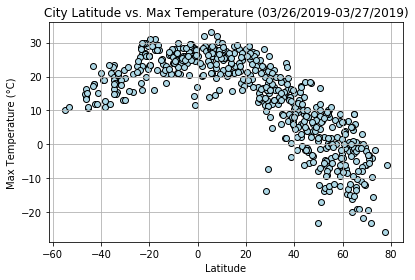

In [69]:
# Add title
plt.title("City Latitude vs. Max Temperature (" + date +")")

# Create labels for the X and Y axis
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid()

# Tell matplotlib to create a scatter plot
plt.scatter(city_data_pd['lat'], city_data_pd['max temp'], marker="o", facecolors="lightblue", edgecolors="black")

# Save the Figure
plt.tight_layout()
plt.savefig("Output_data/LatitudeMaxTemp.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

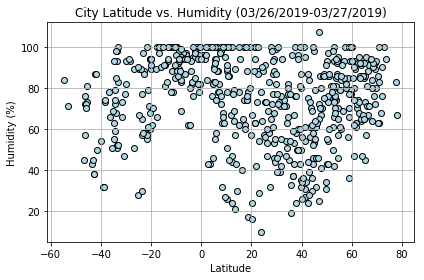

In [70]:
# Add title
plt.title("City Latitude vs. Humidity (" + date +")")

# Create labels for the X and Y axis
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Tell matplotlib to create a scatter plot
plt.scatter(city_data_pd['lat'], city_data_pd['humidity'], marker="o", facecolors="lightblue", edgecolors="black")

# Save the Figure
plt.tight_layout()
plt.savefig("Output_data/LatitudeHumidity.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

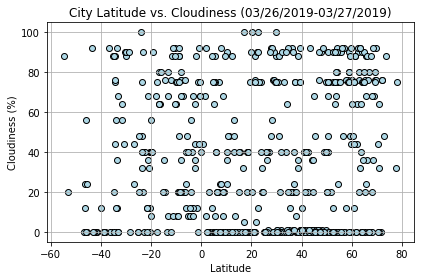

In [71]:
# Add title
plt.title("City Latitude vs. Cloudiness (" + date +")")

# Create labels for the X and Y axis
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Tell matplotlib to create a scatter plot
plt.scatter(city_data_pd['lat'], city_data_pd['cloudiness'], marker="o", facecolors="lightblue", edgecolors="black")

# Save the Figure
plt.tight_layout()
plt.savefig("Output_data/LatitudeCloudiness.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

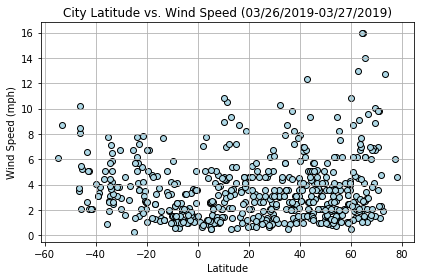

In [72]:
# Add title
plt.title("City Latitude vs. Wind Speed (" + date +")")

# Create labels for the X and Y axis
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Tell matplotlib to create a scatter plot
plt.scatter(city_data_pd['lat'], city_data_pd['wind speed'], marker="o", facecolors="lightblue", edgecolors="black")

# Save the Figure
plt.tight_layout()
plt.savefig("Output_data/LatitudeWindSpeed.png")

# Show the Figure
plt.show()

In [74]:
city_data_pd.count()

city          561
cloudiness    561
country       561
date          561
humidity      561
lat           561
lng           561
max temp      561
wind speed    561
dtype: int64